In [1]:
# MSSG, based on JEM and LCA code
# NB version, Start: 12/2015

%matplotlib inline

### Generic imports
import lmfit
import ipdb
import sys
import random
#import triangle
from argparse import ArgumentParser
import matplotlib.pyplot as plt
import numpy as np

### Specific imports
import galsim
import mssg_deblend
import mssg_drawLibrary
from mssg_makeplot import *
from mssg_create_blend import *

################### Initze

#### Level to do printing at (setting it lower will print more stuff)
presetval = 0

plt.rcParams['image.cmap'] = 'seismic'


#################### Drawgal used to be here


############################################################################# Main

# Parse command line args
parser = ArgumentParser()
parser.add_argument("--outfile", default="deblendsOutput/deblendingTests", help="output text filename")
parser.add_argument("--e1a", default=0, type=float, help="e1a in")
parser.add_argument("--e2a", default=0, type=float, help="e2a in")
parser.add_argument("--e1b", default=0, type=float, help="e1b in")
parser.add_argument("--e2b", default=0, type=float, help="e2b in")
parser.add_argument("--plotflag", default=0, type=int, help="Set to 1 to make plots")
parser.add_argument("--centers", default=1, type=int, help="Set to 1 to use exact centers, 2 to use centers from simfit")

args = parser.parse_args("")

########## Get ellips from cmd line
e1ain = args.e1a
e2ain = args.e2a

e1bin = args.e1b
e2bin = args.e2b

plotflag = args.plotflag

centers = args.centers

# ************************************************************************ 4 arcsec sep
# origpeak_a = (-2,0);   origpeak_b = (2,0)    

# ************************************************************************ 2 arcsec sep
origpeak_a = (-1,0);   origpeak_b = (1,0)    

################### Initze
fitdat = []

peak_a =  np.array(origpeak_a) ; peak_b =  np.array(origpeak_b) 
# print " \n\n\n peak_a = ",  peak_a 

########  Convert peaks_pix to pixels
peaks_pix = [[p1/0.2 for p1 in peak_a],  # Div by 0.2 to convert back to pixels
             [p2/0.2 for p2 in peak_b]]

print " ******************************* Peaks are at: "
print " In Arcsec: peaks_A = " , peak_a
print " In Arcsec: peaks_B = " , peak_b

print "\n Pixels: peaks in pixels = " ,  peaks_pix

# print " Pixels: peaks_pix[0] = " ,  peaks_pix[0][0] 

########### Img params
imsize = 101
pixel_scale = 0.2

 ******************************* Peaks are at: 
 In Arcsec: peaks_A =  [-1  0]
 In Arcsec: peaks_B =  [1 0]

 Pixels: peaks in pixels =  [[-5.0, 0.0], [5.0, 0.0]]


/Users/m/miniconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


peak_a[0] =  -1
imgcent =  50
************** About to show plots with flux a =  10000000.0 , flux_b =  5000000.0


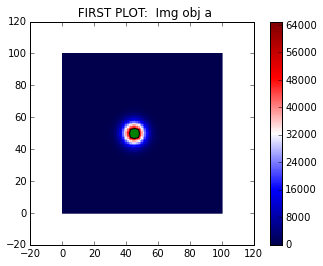

 >>>>>> Plotting img obj a
 image1.array.sum()  9997686.0
 >>>>>> Plotting img obj b


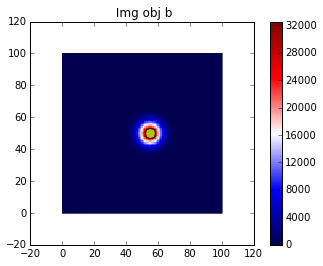

 >>>>>> Plotting imgsum


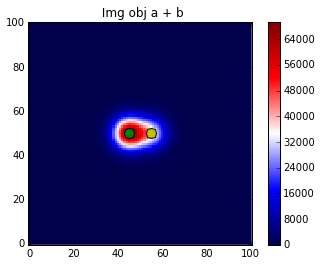

In [2]:
################## Create the blended obj    
blend, unblends = create_blend(peak_a, peak_b, e1a = e1ain,  e2a = e2ain, e1b = e1bin ,e2b = e2bin, imgsize= imsize, pixelscale = pixel_scale, mrkrsize = 10)

if plotflag > presetval:
    plt.title(" Sanity check: Img blended obj - (a+b) ")
    print " >>>>>> Plotting blend.array - (unblends[0].array + unblends[1].array)  "
    plt.imshow( blend.array - (unblends[0].array + unblends[1].array) , origin='lower',  interpolation='none' );    
    plt.colorbar()
    plt.show()

In [ ]:
######################################################### Sim Fit
# Parameters for object a, init guesses
flux_a = 1e5          # total counts on the image 
hlr_a = 1.0            # arcsec
e1_a = 0.0
e2_a = 0.0
x0_a = peak_a[0]
y0_a = peak_a[1]

# Parameters for object b, init guesses
flux_b = flux_a       # total counts on the image
hlr_b = hlr_a         # arcsec
e1_b = 0.0
e2_b = 0.0
x0_b = peak_b[0]
y0_b = peak_b[1]

# Define some seed that's far from true values and insert into
# lmfit object for galaxy one and two

p0 = 1.0*np.array([flux_a,hlr_a,e1_a,e2_a,x0_a,y0_a,
                   flux_b,hlr_b,e1_b,e2_b,x0_b,y0_b]) # These are just the init guesses for the fit (all pre-defined nums from above)

#################### Common
galtype = galsim.Gaussian
dopsfconvln='y'

print " ************** About to fit"



############################################## Obj a
params = lmfit.Parameters()
params.add('flux_a', value=p0[0])   
params.add('hlr_a', value=p0[1], min=0.0)
params.add('e1_a', value=p0[2], min=-1.0, max=1.0)
params.add('e2_a', value=p0[3], min=-1.0, max=1.0)
params.add('x0_a',value=p0[4])
params.add('y0_a',value=p0[5])

params_a = params
result_a = lmfit.minimize(mssg_drawLibrary.resid_1obj,   params_a,   args=(unblends[0], imsize,imsize,pixel_scale, galtype, dopsfconvln ))

# Report the parameters to the interpreter screen                        
lmfit.report_errors(result_a.params)


############################################## Obj b
params = lmfit.Parameters()
params.add('flux_a', value=p0[6])
params.add('hlr_a', value=p0[7], min=0.0)
params.add('e1_a', value=p0[8], min=-1.0, max=1.0)
params.add('e2_a', value=p0[9], min=-1.0, max=1.0)
params.add('x0_a',value=p0[10])
params.add('y0_a',value=p0[11])

params_b = params
result_b = lmfit.minimize(mssg_drawLibrary.resid_1obj,   params_b,   args=(unblends[1], imsize,imsize,pixel_scale, galtype, dopsfconvln ))

# Report the parameters to the interpreter screen                        
lmfit.report_errors(result_b.params)

############################################## Obj a+b
params = lmfit.Parameters()
params.add('flux_a', value=p0[0], min=0.0)   
params.add('hlr_a', value=p0[1], min=0.0)
params.add('e1_a', value=p0[2], min=-1.0, max=1.0)
params.add('e2_a', value=p0[3], min=-1.0, max=1.0)
params.add('x0_a',value=p0[4])
params.add('y0_a',value=p0[5])

params.add('flux_b', value=p0[6], min=0.0)
params.add('hlr_b', value=p0[7], min=0.0)
params.add('e1_b', value=p0[8], min=-1.0, max=1.0)
params.add('e2_b', value=p0[9], min=-1.0, max=1.0)
params.add('x0_b',value=p0[10])
params.add('y0_b',value=p0[11])

tot =  unblends[0]+unblends[1]
#ipdb.set_trace()

result = lmfit.minimize(mssg_drawLibrary.resid_2obj,   params,   args=( tot , imsize,imsize,pixel_scale, galtype, galtype ))

# Report the parameters to the interpreter screen                        
lmfit.report_errors(result.params)

#################### Extract the centers
x0_a_guess = result.params['x0_a'].value
y0_a_guess = result.params['y0_a'].value

x0_b_guess = result.params['x0_b'].value
y0_b_guess = result.params['y0_b'].value

print "\n\n\n x0_a_guess ,  y0_a_guess = ", x0_a_guess ,  y0_a_guess
print " x0_b_guess ,  y0_b_guess = ", x0_b_guess ,  y0_b_guess

######################################################### Deblend
# Use deblending code to separate them
#    templates = for each img
#    template_fractions
#    children = vector of 2 imgs, best estimates from deblending code

########################### Using simfit peaks as centers
if centers == 2:
    curpeak_a = (x0_a_guess, y0_a_guess);       curpeak_b = (x0_b_guess, y0_b_guess);       

########################## Using actual known peaks, to compare
if centers == 1:
    curpeak_a = origpeak_a ;   curpeak_b = origpeak_b

#    ipdb.set_trace()

#  Convert peaks_pix to pixels
peaks_pix = [[p1/0.2 for p1 in curpeak_a],  # Div by 0.2 to convert back to pixels
                         [p2/0.2 for p2 in curpeak_b]]

print " \n\n\n  ************************* About to deblend with these centers: "   
print " Arcsec: peaks_A = " , peak_a
print " Arcsec: peaks_B = " , peak_b
print " Pixels: peaks_pix = " ,  peaks_pix 

################################################################# Assign to actual peak variable
peak_a =  np.array(curpeak_a) ; peak_b =  np.array(curpeak_b) 
peaks_pix = [[p1/0.2 for p1 in peak_a],  # Div by 0.2 to convert back to pixels
                         [p2/0.2 for p2 in peak_b]]

templates, template_fractions, children = mssg_deblend.deblend(blend.array, peaks_pix, interpolate=False, force_interpolate = False)

##### Needed to plot points at center of imgs
imgsize = imsize
pixelscale = pixel_scale 
imgcent = imgsize/2
acent = (imgcent+peak_a[0]/pixelscale, imgcent+peak_a[1]/pixelscale)
bcent = (imgcent+peak_b[0]/pixelscale, imgcent+peak_b[1]/pixelscale)

center= (acent,bcent)
print "center[0][0] = ",center[0][0]
print "center[0][1] = ",center[0][1]
print "center[1][0] = ",center[1][0]
print "center[1][1] = ",center[1][1] 

In [ ]:
########## Plot template
if plotflag > presetval-1:
    pltname = " Template obj a "
    pltcontent = template_fractions[0] 
    makeplot(pltname, pltcontent, centre=center)

######### Plot children
    ### Obj a
    pltname = " Unblended img a ";        pltcontent = unblends[0]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Deblended img a ";        pltcontent = children[0]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)


    pltname = " Resid of: (Deblended child a - Unblended img a) ";        pltcontent = (children[0] - unblends[0].array)
    makeplot(pltname, pltcontent, centre=center)

    # Normalize these        
    pltname = " Resid of: (Deblended child a - Unblended img a) / Unblended img a ";        pltcontent = (children[0] - unblends[0].array)/  unblends[0].array
    makeplot(pltname, pltcontent, centre=center)


    pltname = " Colorbar = -1 to 1 & Resid of: (Deblended child a - Unblended img a) / Unblended img a ";        pltcontent = (children[0] - unblends[0].array)/  unblends[0].array
    makeplot(pltname, pltcontent, centre=center, colorbarlimit=1)

    peakval = unblends[0].array[acent[0], acent[1]]
    print " peakval = ", peakval

    pltname = " Resid of: (Deblended child a - Unblended img a) / peak val of a ";        pltcontent = (children[0] - unblends[0].array)/  peakval
    makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Unblended img a) / Unblended img a ";        pltcontent = (unblends[0].array)/  unblends[0].array
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    ### Obj b
    pltname = " Unblended img b ";        pltcontent = unblends[1]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Deblended img b ";        pltcontent = children[1]
    if plotflag > presetval:
              makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Deblended child b - Unblended img b) ";        pltcontent = children[1] - unblends[1].array 
    makeplot(pltname, pltcontent, centre=center)

    # Normalized
    pltname = " Resid of: (Deblended child b - Unblended img b) /  Unblended img b ";        pltcontent = (children[1] - unblends[1].array ) /  unblends[1].array 
    makeplot(pltname, pltcontent ,  centre=center)

    pltname = " Colorbar = -1 to 1 & Resid of: (Deblended child b - Unblended img b) /  Unblended img b ";        pltcontent = (children[1] - unblends[1].array ) /  unblends[1].array 
    makeplot(pltname, pltcontent , colorbarlimit=1, centre=center)

    peakval = unblends[1].array[bcent[0], bcent[1]]
    print " peakval = ", peakval

    pltname = " Resid of: (Deblended child b - Unblended img b) / peak val of b ";        pltcontent = (children[1] - unblends[1].array)/  peakval
    makeplot(pltname, pltcontent, centre=center)

    pltname = " Resid of: (Unblended img b) /  Unblended img b ";        pltcontent = (unblends[1].array ) / unblends[1].array 
    makeplot(pltname, pltcontent, colorbarlimit=1, centre=center)



In [ ]:
###################################################### Run deblended fits
print " ***** Now about to run lmfit "
# Common params to all

# The below are just initial guesses for the fitter
minmaxval = 0.7 # Temporary limit for the fitter till i fix it better by doing value in quadrature
fit_params = lmfit.Parameters()  
fit_params.add('e1_a', value=0.0, min= -minmaxval, max=minmaxval)
fit_params.add('e2_a', value=0.0, min= -minmaxval, max=minmaxval)
fit_params.add('flux_a', value=2000.0)
fit_params.add('x0_a', value=0)
fit_params.add('y0_a', value=0)
fit_params.add('hlr_a', value=0.43)

####### Whether to convolve with PSF
dopsfconvln = 'y'

 ###################################### Obj a
 ############# Unbl Obj a        
origimg = unblends[0]    
mlresult = lmfit.minimize(mssg_drawLibrary.resid_1obj, fit_params, args=(origimg,imsize,imsize,pixel_scale, galtype , dopsfconvln) ) 

# Extract vals
e1_a = mlresult.params['e1_a'].value  # Get out e1 val of obj a from fit
e2_a = mlresult.params['e2_a'].value  # Get out e2 val of obj a from fit
e1err = np.sqrt(np.diag(mlresult.covar)[0])
e2err = np.sqrt(np.diag(mlresult.covar)[1])

print "\n\n ********************* Unbl Obj a "
print "e1_a = ", e1_a, " ,  e1err = ", e1err
print "e2_a = ", e2_a, " ,  e2err = ", e2err

e1a_unbl = e1_a ; e2a_unbl = e2_a 
e1a_unblerr = e1err ; e2a_unblerr = e2err 

        # x and y posn
x0_a = mlresult.params['x0_a'].value  # Get out x0 val of obj a from fit
y0_a = mlresult.params['y0_a'].value  # Get out y0 val of obj a from fit

x0a_unbl = x0_a ;  y0a_unbl = y0_a


############ Deblended Obj a
origimg = children[0]    
mlresult = lmfit.minimize(mssg_drawLibrary.resid_1obj, fit_params, args=(origimg,imsize,imsize,pixel_scale, galtype, dopsfconvln) ) 


origimg = children[0]    
mlresult = lmfit.minimize(mssg_drawLibrary.resid_1obj, fit_params, args=(origimg,imsize,imsize,pixel_scale, galtype, dopsfconvln) ) 

# Extract vals
e1_a = mlresult.params['e1_a'].value  # Get out e1 val of obj a from fit
e2_a = mlresult.params['e2_a'].value  # Get out e2 val of obj a from fit
e1err = np.sqrt(np.diag(mlresult.covar)[0])
e2err = np.sqrt(np.diag(mlresult.covar)[1])

print "\n *********  Deblended Obj a "
print "e1_a = ", e1_a, " ,  e1err = ", e1err
print "e2_a = ", e2_a, " ,  e2err = ", e2err

e1a_debl = e1_a ; e2a_debl = e2_a 
e1a_deblerr = e1err ; e2a_deblerr = e2err 

# x and y posn
x0_a = mlresult.params['x0_a'].value  # Get out x0 val of obj a from fit
y0_a = mlresult.params['y0_a'].value  # Get out y0 val of obj a from fit
x0a_debl = x0_a ;  y0a_debl = y0_a


########### Unbl Obj b        
origimg = unblends[1]    
mlresult = lmfit.minimize(mssg_drawLibrary.resid_1obj, fit_params, args=(origimg,imsize,imsize,pixel_scale, galtype, dopsfconvln) )  

# Extract vals
e1_b = mlresult.params['e1_a'].value  # Get out e1 val of obj a from fit
e2_b = mlresult.params['e2_a'].value  # Get out e2 val of obj a from fit
e1err = np.sqrt(np.diag(mlresult.covar)[0])
e2err = np.sqrt(np.diag(mlresult.covar)[1])

print "\n\n *********************  Unbl Obj b "
print "e1_b = ", e1_b, " ,  e1err = ", e1err
print "e2_b = ", e2_b, " ,  e2err = ", e2err

e1b_unbl = e1_b ; e2b_unbl = e2_b 
e1b_unblerr = e1err ; e2b_unblerr = e2err 

# x and y posn
x0_b = mlresult.params['x0_a'].value  # Get out x0 val of obj a from fit
y0_b = mlresult.params['y0_a'].value  # Get out y0 val of obj a from fit
x0b_unbl = x0_b ;  y0b_unbl = y0_b

######## Deblended Obj b
origimg = children[1]    
mlresult = lmfit.minimize(mssg_drawLibrary.resid_1obj, fit_params, args=(origimg,imsize,imsize,pixel_scale, galtype, dopsfconvln) )  

# Extract vals  -- note that calling below: mlresult.params['e1_a']  is correct because the '_a' name is defined that way inside the fitter
e1_b = mlresult.params['e1_a'].value  # Get out e1 val of obj a from fit
e2_b = mlresult.params['e2_a'].value  # Get out e2 val of obj a from fit
e1err = np.sqrt(np.diag(mlresult.covar)[0])
e2err = np.sqrt(np.diag(mlresult.covar)[1])

print "\n **********  Deblended Obj b "
print "e1_b = ", e1_b, " ,  e1err = ", e1err
print "e2_b = ", e2_b, " ,  e2err = ", e2err

e1b_debl  = e1_b ; e2b_debl  = e2_b 
e1b_deblerr = e1err ; e2b_deblerr = e2err 

# x and y posn
x0_b = mlresult.params['x0_a'].value  # Get out x0 val of obj a from fit
y0_b = mlresult.params['y0_a'].value  # Get out y0 val of obj a from fit
x0b_debl = x0_b ;  y0b_debl = y0_b


# Report the parameters to the interpreter screen                        
#    lmfit.report_errors(mlresult.params)

# ....................